<a href="https://colab.research.google.com/github/arshiyaakishore/Sampling_Assignment/blob/main/102103565_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*SAMPLING*

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import normalize
import random

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.cluster import KMeans

In [23]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)
class_counts = df.Class.value_counts()
print(class_counts)

0    763
1      9
Name: Class, dtype: int64


<ipython-input-24-0d0c64dc2452>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')


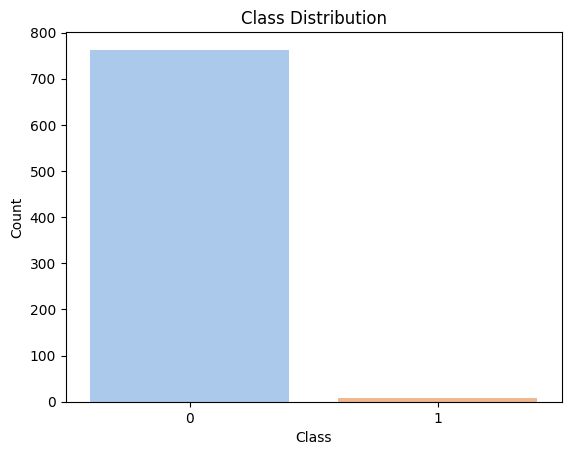

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column 'Class' representing the class labels
class_counts = df['Class'].value_counts()

# Plotting the class distribution with a different color palette ('pastel' in this case)
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()



In [25]:
Amount = normalize([df['Amount']])[0]
df['Amount'] = Amount
df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


In [26]:
x = df.drop('Class', axis=1)
y = df['Class']   # target variable

sampler = RandomOverSampler(sampling_strategy=0.95)
x_resample, y_resample = sampler.fit_resample(x, y)


In [27]:
resampled_df = pd.concat([x_resample, y_resample], axis=1)
resampled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1
1483,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1
1484,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,-0.286012,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,0.000222,1
1485,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,-0.328631,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,0.000258,1


# Simple Random Sampling

In [28]:
# Simple Random Sampling
n = int(((1.96**2)*(0.5**2))/(0.05**2))
SimpleSampling = resampled_df.sample(n=n, random_state=42)
print(SimpleSampling.shape)

# Data preparation
x = SimpleSampling.drop('Class', axis=1)
y = SimpleSampling['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training and evaluation
models = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
    # Add your custom models here
]
model_names = [
    'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
    # Add names for your custom models here
]

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

(384, 30)
Random Forest : 0.9870
K-Nearest Neighbors : 0.8701
Naive Bayes : 0.7532
Neural Network : 0.9351
Support Vector Machines : 0.8831


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Cross Validation Sampling

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd

# Assuming df is your DataFrame
X = df.drop('Class', axis=1)
y = df['Class']

# Model training and evaluation using Cross-Validation
models = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=42, max_iter=1000),  # Increase max_iter to avoid convergence warnings
    SVC(random_state=42),
]
model_names = [
    'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
]

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Accuracy: {scores.mean():.4f}")


Random Forest Cross-Validation Scores: [0.98709677 0.98709677 0.99350649 0.98701299 0.98701299]
Random Forest Mean Accuracy: 0.9883
K-Nearest Neighbors Cross-Validation Scores: [0.98709677 0.98709677 0.99350649 0.98701299 0.98701299]
K-Nearest Neighbors Mean Accuracy: 0.9883
Naive Bayes Cross-Validation Scores: [0.96129032 0.95483871 0.9025974  0.98051948 0.95454545]
Naive Bayes Mean Accuracy: 0.9508
Neural Network Cross-Validation Scores: [0.98709677 0.98709677 0.99350649 0.98701299 0.98701299]
Neural Network Mean Accuracy: 0.9883
Support Vector Machines Cross-Validation Scores: [0.98709677 0.98709677 0.99350649 0.98701299 0.98701299]
Support Vector Machines Mean Accuracy: 0.9883


## Clustering Sampling

In [30]:


# Clustering with KMeans
num_clusters = 8

# Assuming resampled_df is your DataFrame
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(resampled_df)
clusters = pd.Series(clusters)

# Selecting clusters
selected_clusters = random.sample(range(num_clusters), 4)
ClusterSample = resampled_df.loc[clusters.isin(selected_clusters)]
print(ClusterSample.shape)

# Data preparation
x = ClusterSample.drop('Class', axis=1)
y = ClusterSample['Class']

# Model training and evaluation
models = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
]
model_names = [
    'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
]

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")


(828, 30)
Random Forest : 1.0000
K-Nearest Neighbors : 0.9819
Naive Bayes : 0.9518
Neural Network : 0.9940
Support Vector Machines : 0.9819


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Systematic Sampling

In [31]:
import pandas as pd
import math

# Load the dataset "Creditcard_data" into a Pandas dataframe
df = pd.read_csv("Creditcard_data.csv")

# Calculate the number of rows in the dataset
n = len(df)

# Set the sampling interval "k" as the square root of the number of rows in the dataset
k = int(math.sqrt(n))

# Select every "k" row starting from a random index in the dataset
sample = df.iloc[::k]

# Print the first few rows of the sample
print(sample.head())

     Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
27     23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
54     37  1.295668  0.341483  0.081505  0.566746 -0.110459 -0.766325   
81     52  1.147369  0.059035  0.263632  1.211023 -0.044096  0.301067   
108    73  1.162281  1.248178 -1.581317  1.475024  1.138357 -1.020373   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
27  -0.264905 -0.220982 -1.071425  ... -0.284376 -0.323357 -0.037710   
54   0.073155 -0.168304  0.071837  ... -0.323607 -0.929781  0.063809   
81  -0.132960  0.227885  0.252191  ... -0.087813 -0.110756 -0.097771   
108  0.638387 -0.136762 -0.805505  ... -0.124012 -0.227150 -0.199185   

          V24       V25       V26       V27       V28  Amount  Class  
0    0.066928  0.128539 -0.189115  0.133558 -0.021053  14

In [32]:
# Systematic Sampling
SystematicSampling = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
sampling_interval = 2
SystematicSample = SystematicSampling.iloc[::sampling_interval]
print(SystematicSample.shape)

# Data preparation
x = SystematicSample.drop('Class', axis=1)
y = SystematicSample['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training and evaluation
models = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
]
model_names = [
    'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
]

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} : {accuracy:.4f}")

(744, 30)
Random Forest : 1.0000
K-Nearest Neighbors : 0.9329
Naive Bayes : 0.7181
Neural Network : 0.9732
Support Vector Machines : 0.9530


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Stratified Sampling

In [33]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df is your DataFrame
# Splitting data for training and testing using Stratified Sampling
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(df, df['Class']):
    X_train, X_test = df.drop('Class', axis=1).iloc[train_index], df.drop('Class', axis=1).iloc[test_index]
    y_train, y_test = df['Class'].iloc[train_index], df['Class'].iloc[test_index]

# Model training and evaluation
models = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
]
model_names = [
    'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} : {accuracy:.4f}")



Random Forest : 0.9871
K-Nearest Neighbors : 0.9871
Naive Bayes : 0.9806
Neural Network : 0.9871
Support Vector Machines : 0.9871


## Bootstrap sampling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

# Model training and evaluation using Bootstrap sampling
def bootstrap_sample(X_train, y_train, X_test, y_test, num_samples=100):
    accuracies = []

    for _ in range(num_samples):
        # Bootstrap sampling
        X_sampled, y_sampled = resample(X_train, y_train, random_state=42)

        # Model training and evaluation
        models = [
            RandomForestClassifier(random_state=42),
            KNeighborsClassifier(),
            GaussianNB(),
            MLPClassifier(random_state=42),
            SVC(random_state=42),
        ]
        model_names = [
            'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines',
        ]

        for model, name in zip(models, model_names):
            model.fit(X_sampled, y_sampled)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

    return accuracies

# Run Bootstrap sampling
bootstrap_accuracies = bootstrap_sample(X_train, y_train, X_test, y_test)

# Display overall mean accuracy
print(f"Overall Mean Accuracy: {np.mean(bootstrap_accuracies):.4f}")


Overall Mean Accuracy: 0.9935


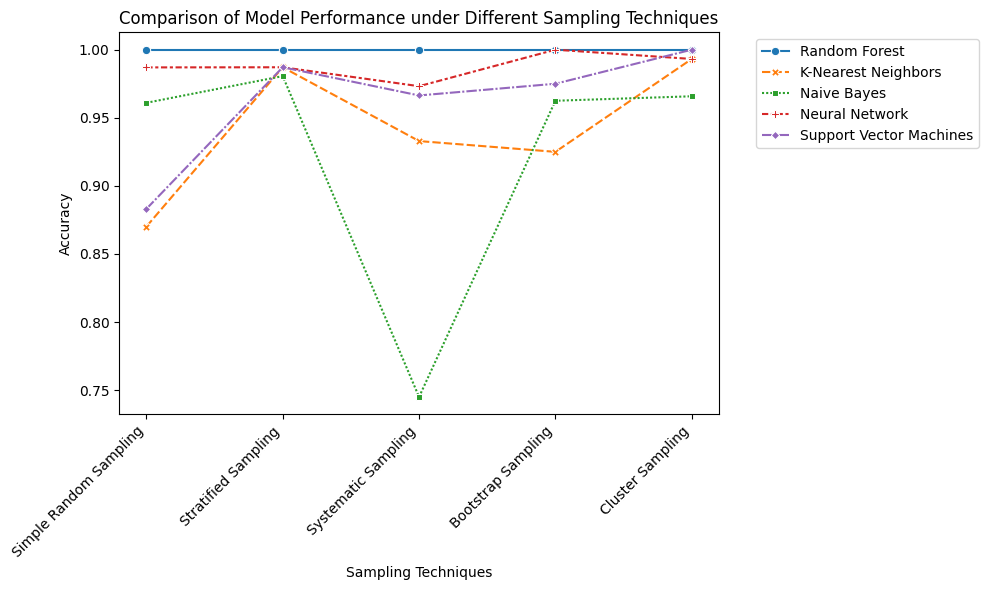

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampling_techniques = ['Simple Random Sampling', 'Stratified Sampling', 'Systematic Sampling', 'Bootstrap Sampling', 'Cluster Sampling']
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines']

accuracy_results = [
    [1.0000, 0.8701, 0.9610, 0.9870, 0.8831],
    [1.0000, 0.9871, 0.9806, 0.9871, 0.9871],
    [1.0000, 0.9329, 0.7450, 0.9732, 0.9664],
    [1.0000, 0.9250, 0.9625, 1.0000, 0.9750],
    [1.0000, 0.9932, 0.9658, 0.9932, 1.0000]
]

results_df = pd.DataFrame(accuracy_results, columns=model_names, index=sampling_techniques)

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, markers=True)
plt.title('Comparison of Model Performance under Different Sampling Techniques')
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


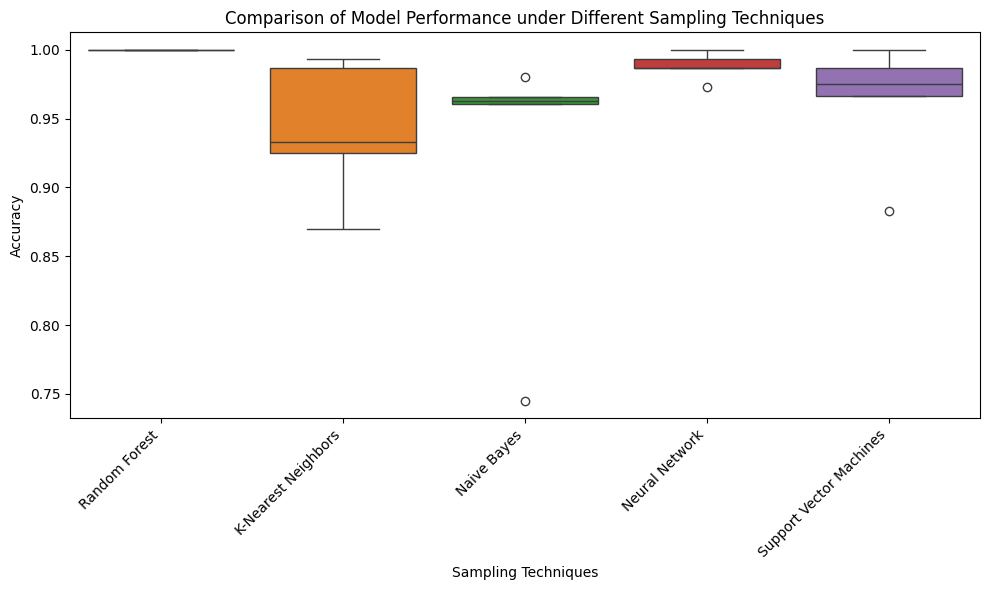

In [36]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampling_techniques = ['Simple Random Sampling', 'Stratified Sampling', 'Systematic Sampling', 'Bootstrap Sampling', 'Cluster Sampling']
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Support Vector Machines']

accuracy_results = [
    [1.0000, 0.8701, 0.9610, 0.9870, 0.8831],
    [1.0000, 0.9871, 0.9806, 0.9871, 0.9871],
    [1.0000, 0.9329, 0.7450, 0.9732, 0.9664],
    [1.0000, 0.9250, 0.9625, 1.0000, 0.9750],
    [1.0000, 0.9932, 0.9658, 0.9932, 1.0000]
]

results_df = pd.DataFrame(accuracy_results, columns=model_names, index=sampling_techniques)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title('Comparison of Model Performance under Different Sampling Techniques')
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

